In [ ]:
!pip install -r rec.txt

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.3.4.tar.gz (37.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.11.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached scikit-learn-0.24.1.tar.gz (7.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for out

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [ ]:
df = pd.read_csv("processed_weather_data.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,Temp,WindSpeed,Humidity,RainToday,RainTomorrow
0,2008-12-01,Albury,18.15,22.0,46.5,No,No
1,2008-12-02,Albury,16.25,13.0,34.5,No,No
2,2008-12-03,Albury,19.30,22.5,34.0,No,No
3,2008-12-04,Albury,18.60,10.0,30.5,No,No
4,2008-12-05,Albury,24.90,13.5,57.5,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,13.10,12.0,37.5,No,No
145456,2017-06-22,Uluru,14.45,11.0,38.5,No,No
145457,2017-06-23,Uluru,16.15,9.0,38.5,No,No
145458,2017-06-24,Uluru,17.40,10.0,37.5,No,No


In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 3
Discrete feature Count 0
Continuous feature Count 3
Categorical feature Count 4


In [ ]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
Temp,0.594665
WindSpeed,0.833906
Humidity,1.297264
RainToday,2.241853
RainTomorrow,2.245978


In [ ]:
print(numerical_feature)

['Temp', 'WindSpeed', 'Humidity']


In [ ]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [ ]:
df

,Date,Location,Temp,WindSpeed,Humidity,RainToday,RainTomorrow
0,2008-12-01,Albury,18.15,22.0,46.5,No,No
1,2008-12-02,Albury,16.25,13.0,34.5,No,No
2,2008-12-03,Albury,19.30,22.5,34.0,No,No
3,2008-12-04,Albury,18.60,10.0,30.5,No,No
4,2008-12-05,Albury,24.90,13.5,57.5,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,13.10,12.0,37.5,No,No
145456,2017-06-22,Uluru,14.45,11.0,38.5,No,No
145457,2017-06-23,Uluru,16.15,9.0,38.5,No,No
145458,2017-06-24,Uluru,17.40,10.0,37.5,No,No


<ipython-input-10-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


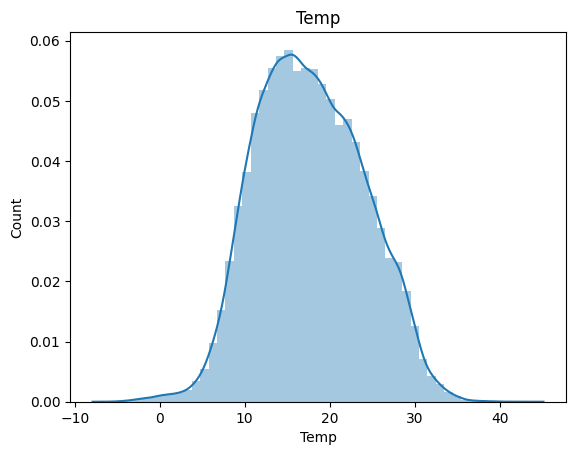

<Figure size 1500x1500 with 0 Axes>

<ipython-input-10-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


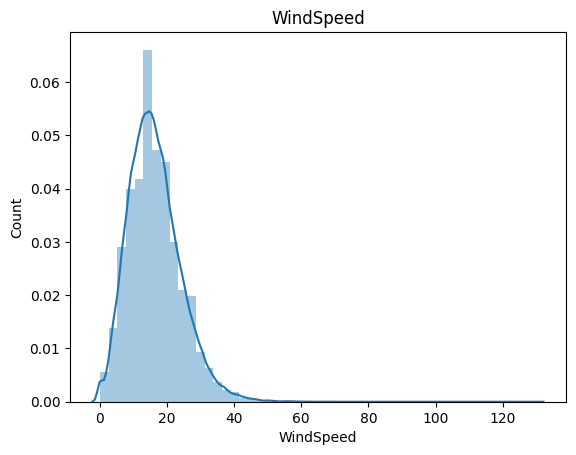

<Figure size 1500x1500 with 0 Axes>

<ipython-input-10-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


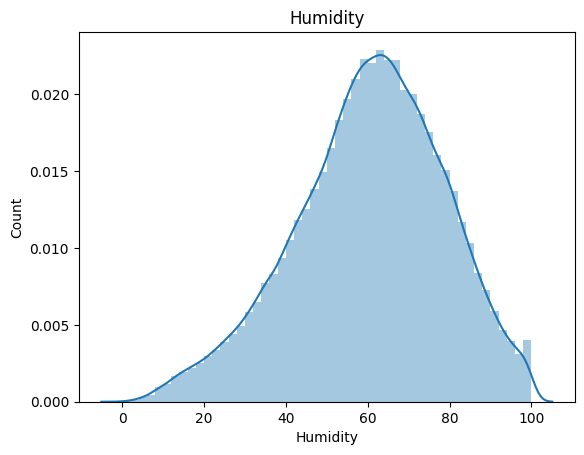

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

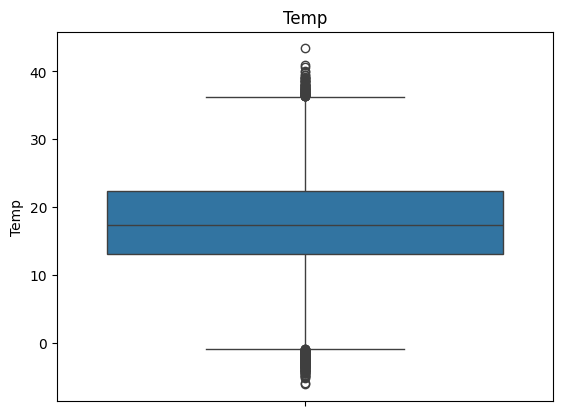

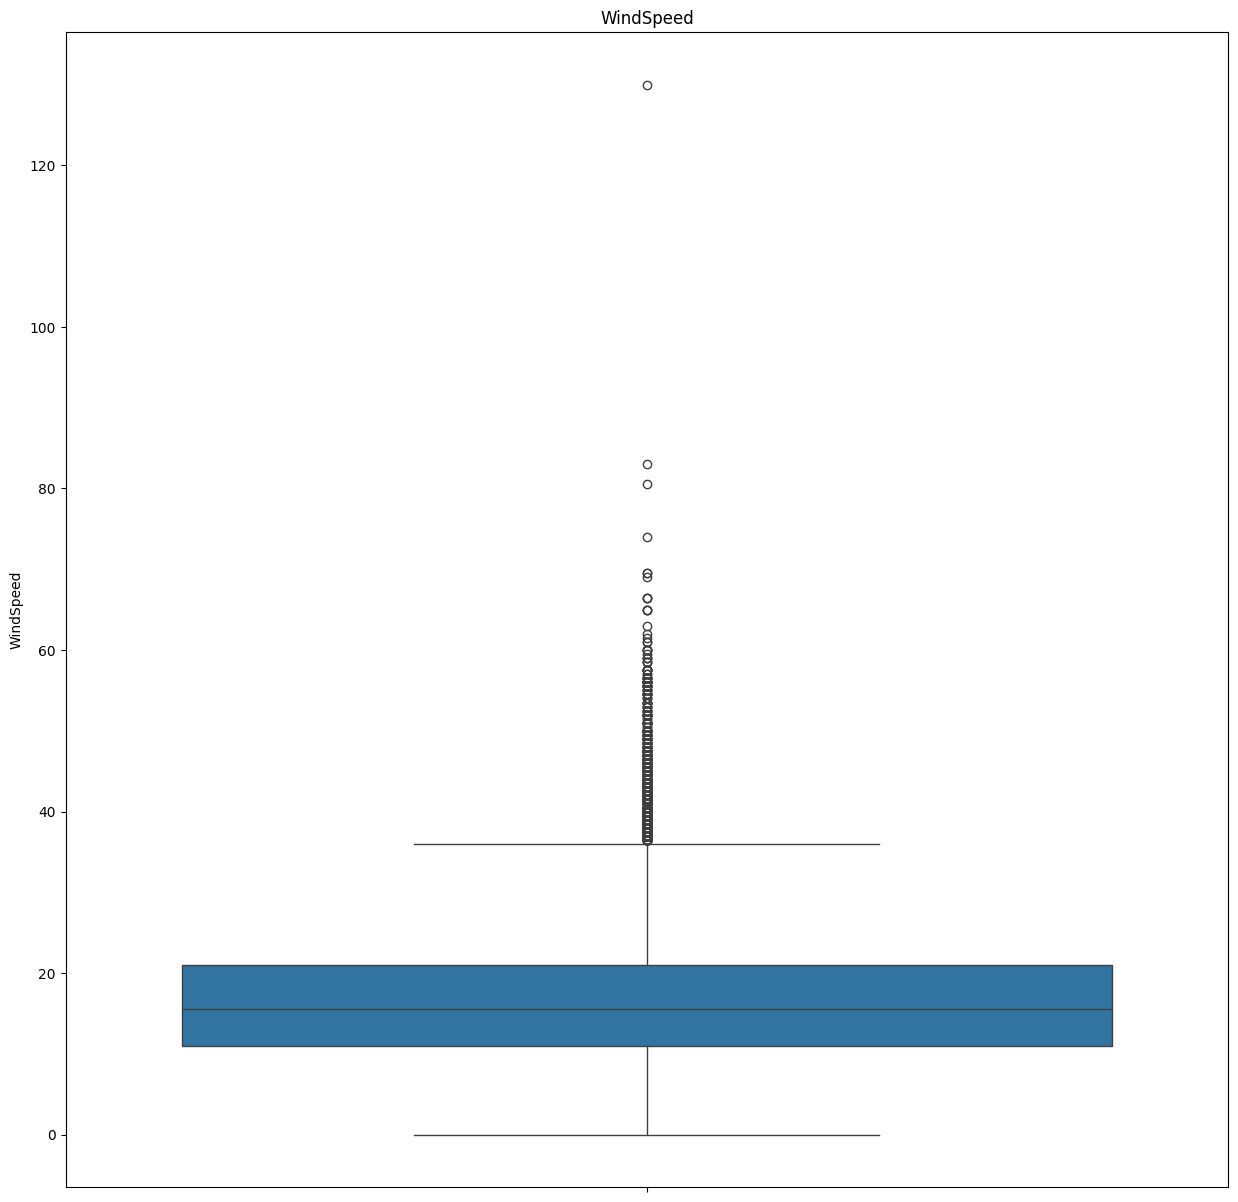

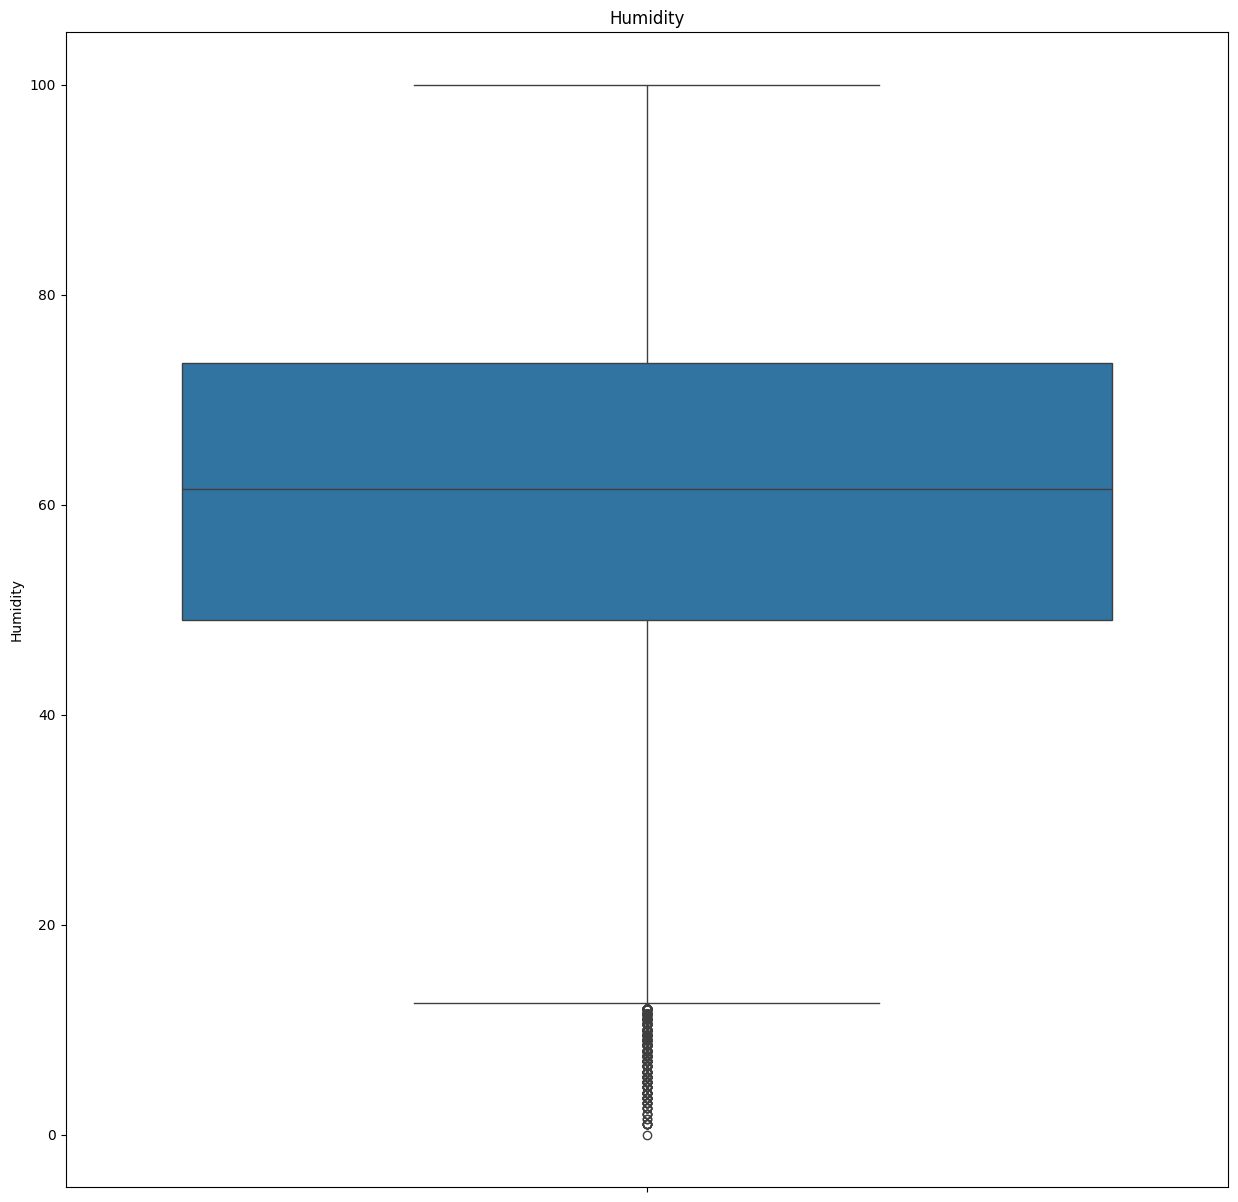

<Figure size 1500x1500 with 0 Axes>

In [ ]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [ ]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [ ]:
df.isnull().sum()*100/len(df)

,0
Date,0.000000
Location,0.000000
Temp,0.000000
WindSpeed,0.000000
Humidity,0.000000
RainToday,2.241853
RainTomorrow,2.245978


In [ ]:
discrete_feature

[]

In [ ]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)


In [ ]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,Temp,WindSpeed,Humidity,RainToday,RainTomorrow
0,2008-12-01,Albury,18.15,22.0,46.5,False,False
1,2008-12-02,Albury,16.25,13.0,34.5,False,False
2,2008-12-03,Albury,19.30,22.5,34.0,False,False
3,2008-12-04,Albury,18.60,10.0,30.5,False,False
4,2008-12-05,Albury,24.90,13.5,57.5,False,False
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,13.10,12.0,37.5,False,False
145456,2017-06-22,Uluru,14.45,11.0,38.5,False,False
145457,2017-06-23,Uluru,16.15,9.0,38.5,False,False
145458,2017-06-24,Uluru,17.40,10.0,37.5,False,False


In [ ]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [ ]:
del(df["Location"])
df

,Date,Temp,WindSpeed,Humidity,RainToday,RainTomorrow
0,2008-12-01,18.15,22.0,46.5,False,False
1,2008-12-02,16.25,13.0,34.5,False,False
2,2008-12-03,19.30,22.5,34.0,False,False
3,2008-12-04,18.60,10.0,30.5,False,False
4,2008-12-05,24.90,13.5,57.5,False,False
...,...,...,...,...,...,...
145455,2017-06-21,13.10,12.0,37.5,False,False
145456,2017-06-22,14.45,11.0,38.5,False,False
145457,2017-06-23,16.15,9.0,38.5,False,False
145458,2017-06-24,17.40,10.0,37.5,False,False


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df

,Date,Temp,WindSpeed,Humidity,RainToday,RainTomorrow,Month,Day
0,2008-12-01,18.15,22.0,46.5,False,False,12,1
1,2008-12-02,16.25,13.0,34.5,False,False,12,2
2,2008-12-03,19.30,22.5,34.0,False,False,12,3
3,2008-12-04,18.60,10.0,30.5,False,False,12,4
4,2008-12-05,24.90,13.5,57.5,False,False,12,5
...,...,...,...,...,...,...,...,...
145455,2017-06-21,13.10,12.0,37.5,False,False,6,21
145456,2017-06-22,14.45,11.0,38.5,False,False,6,22
145457,2017-06-23,16.15,9.0,38.5,False,False,6,23
145458,2017-06-24,17.40,10.0,37.5,False,False,6,24


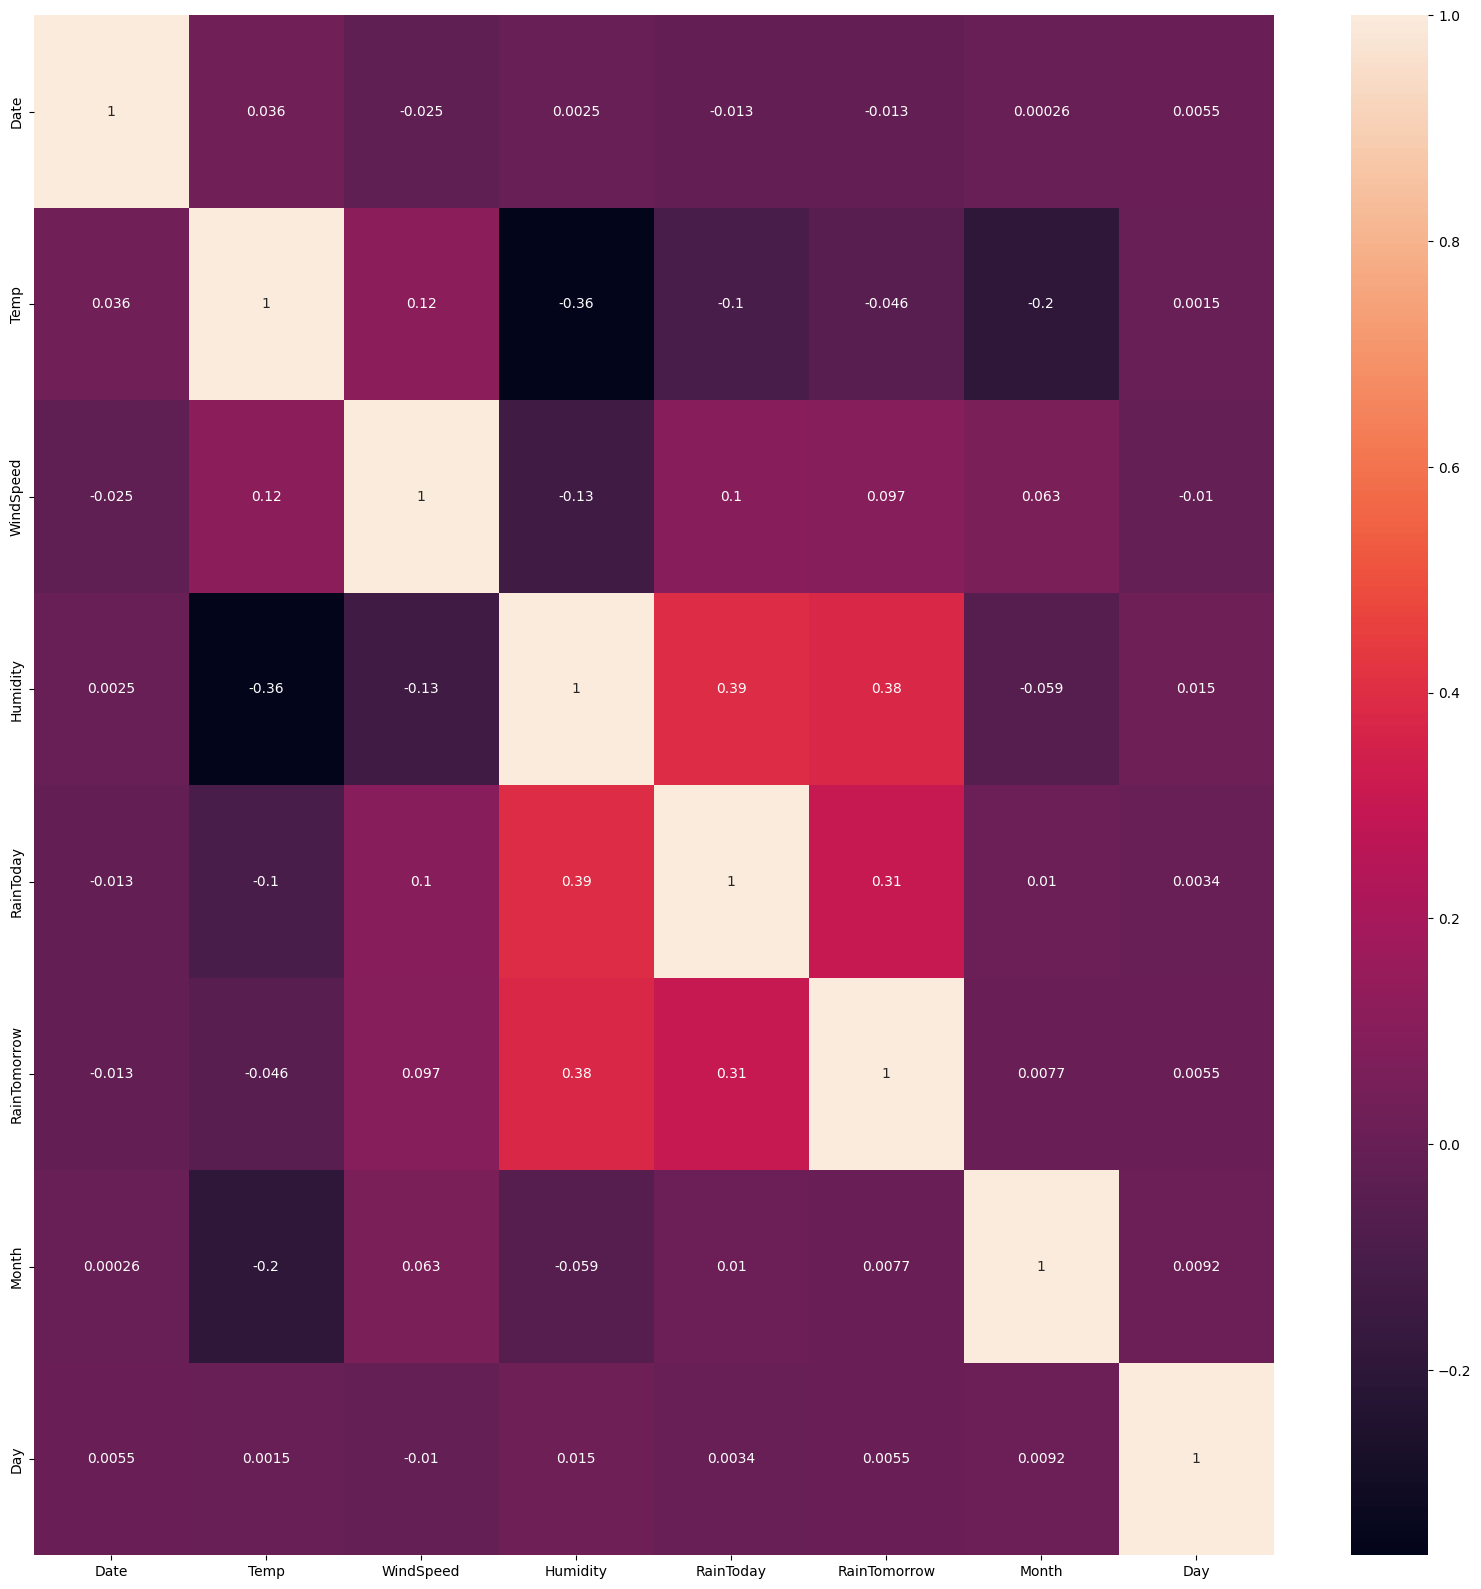

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
df

,Date,Temp,WindSpeed,Humidity,RainToday,RainTomorrow,Month,Day
0,2008-12-01,18.15,22.0,46.5,False,False,12,1
1,2008-12-02,16.25,13.0,34.5,False,False,12,2
2,2008-12-03,19.30,22.5,34.0,False,False,12,3
3,2008-12-04,18.60,10.0,30.5,False,False,12,4
4,2008-12-05,24.90,13.5,57.5,False,False,12,5
...,...,...,...,...,...,...,...,...
145455,2017-06-21,13.10,12.0,37.5,False,False,6,21
145456,2017-06-22,14.45,11.0,38.5,False,False,6,22
145457,2017-06-23,16.15,9.0,38.5,False,False,6,23
145458,2017-06-24,17.40,10.0,37.5,False,False,6,24


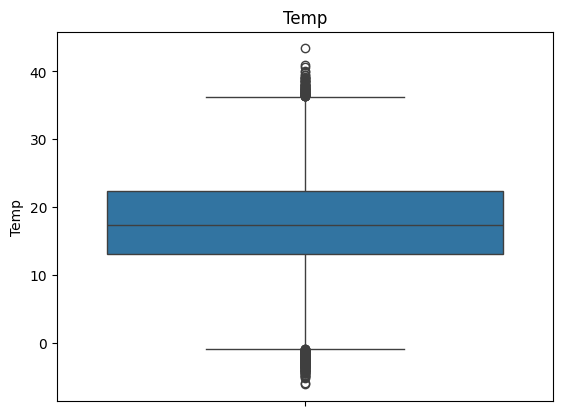

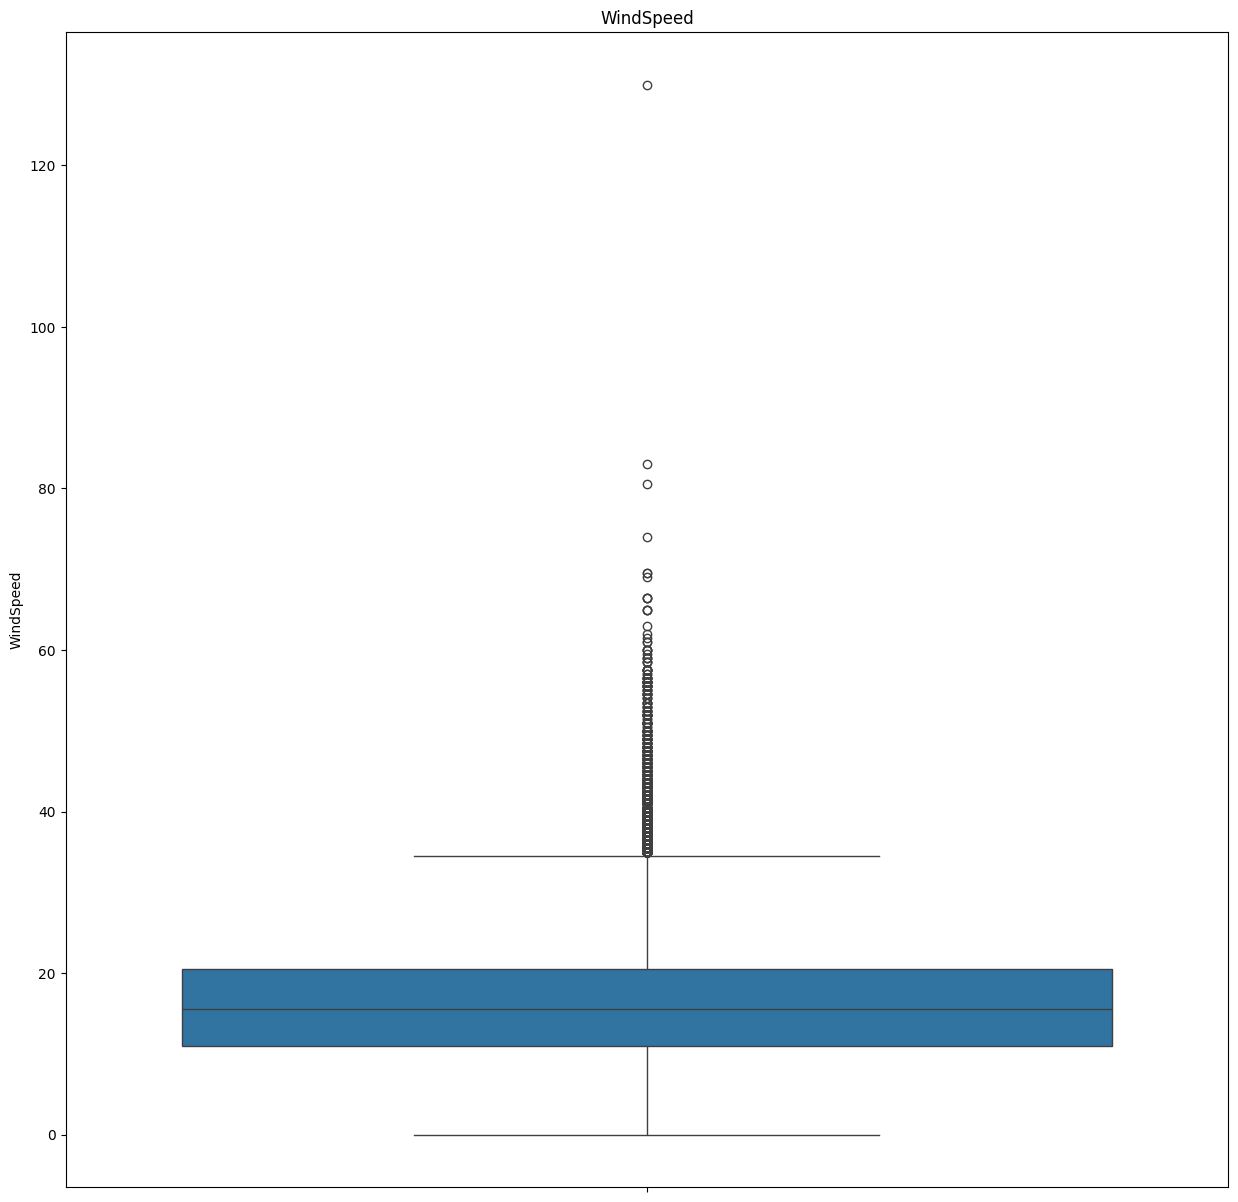

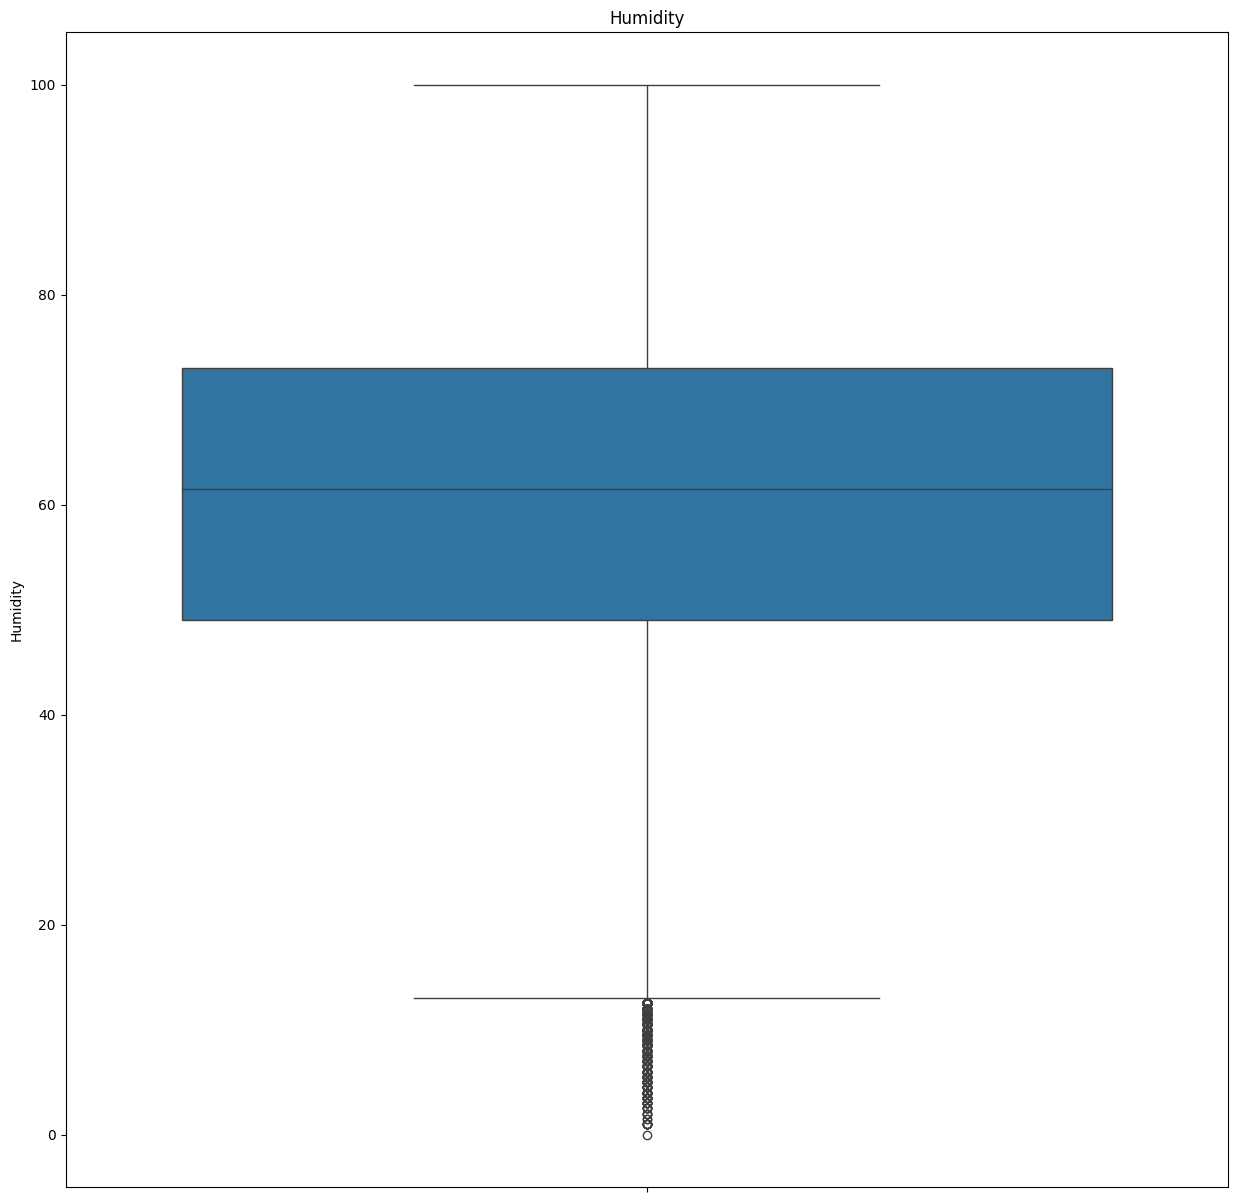

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [ ]:
for feature in continuous_feature:
    print(feature)

Temp
WindSpeed
Humidity


In [ ]:
IQR=df.Temp.quantile(0.75)-df.Temp.quantile(0.25)
lower_bridge=df.Temp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.9500000000000011 36.25


In [ ]:
df.loc[df['Temp']>=36.975,'Temp']=36.975
df.loc[df['Temp']<=2.7,'Temp']=2.7

In [ ]:
IQR=df.WindSpeed.quantile(0.75)-df.WindSpeed.quantile(0.25)
lower_bridge=df.WindSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.25 34.75


In [ ]:
df.loc[df['WindSpeed']>=38.75,'WindSpeed']=38.75
df.loc[df['WindSpeed']<=-7.25,'WindSpeed']=-7.25

In [ ]:
IQR=df.Humidity.quantile(0.75)-df.Humidity.quantile(0.25)
lower_bridge=df.Humidity.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

13.0 109.0


In [ ]:
df.loc[df['Humidity']>=122,'Humidity']=122
df.loc[df['Humidity']<=18,'Humidity']=18

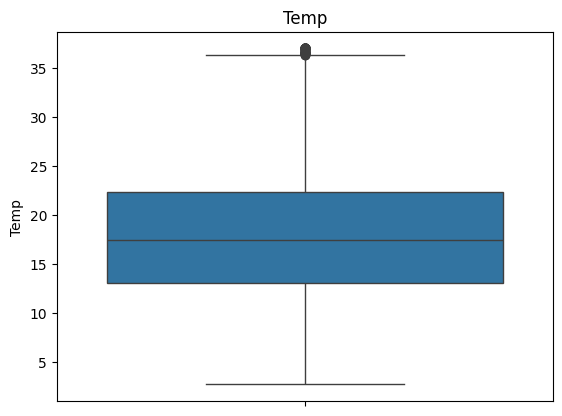

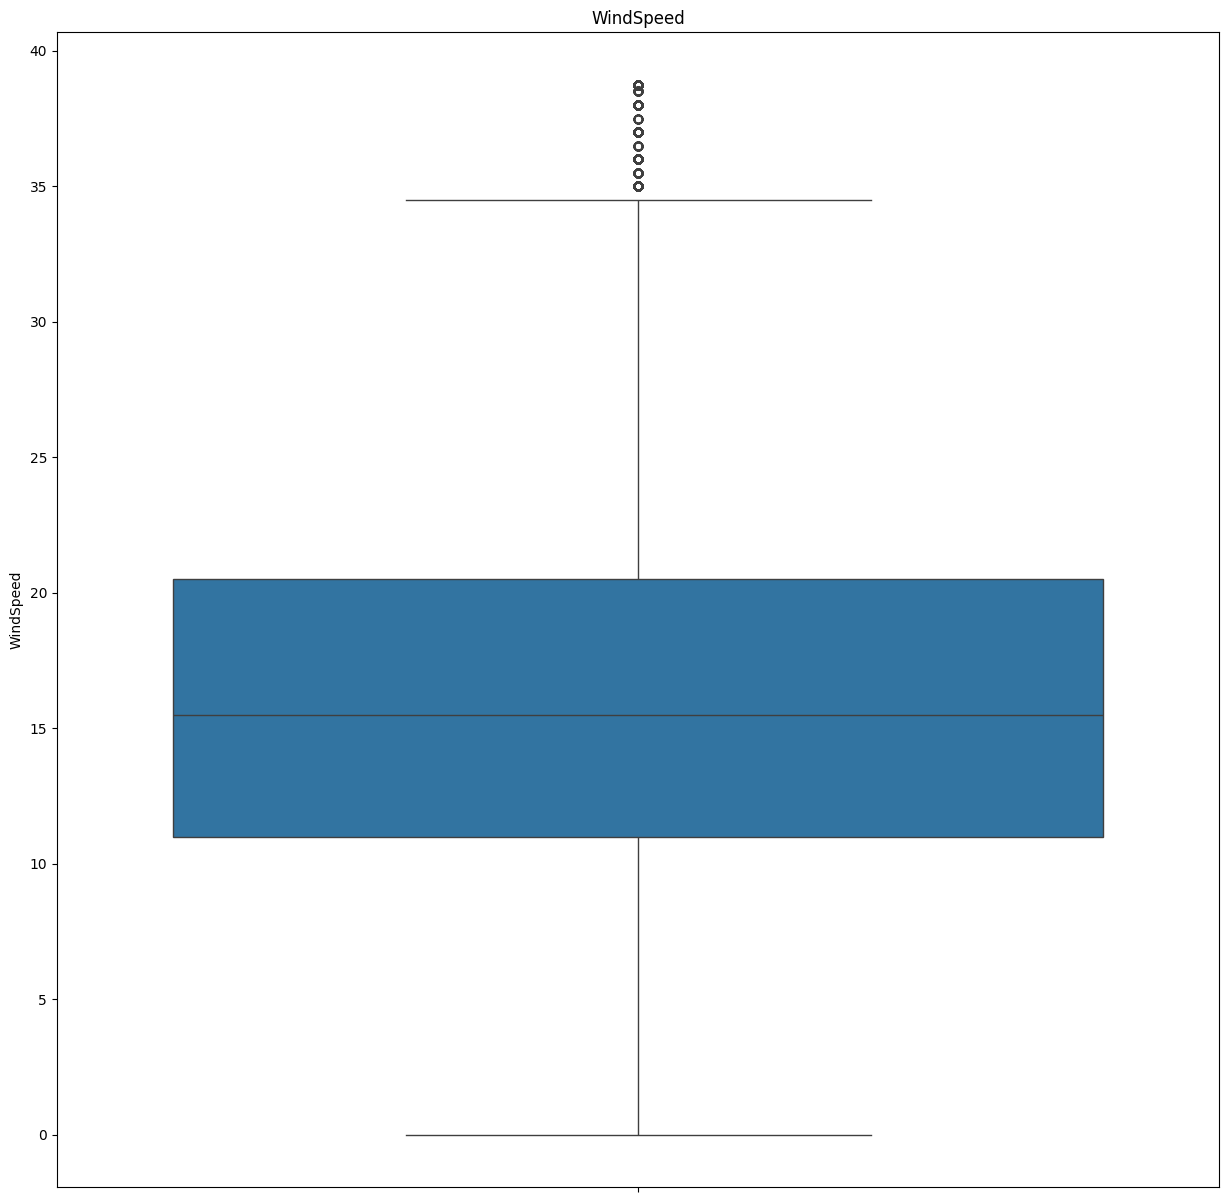

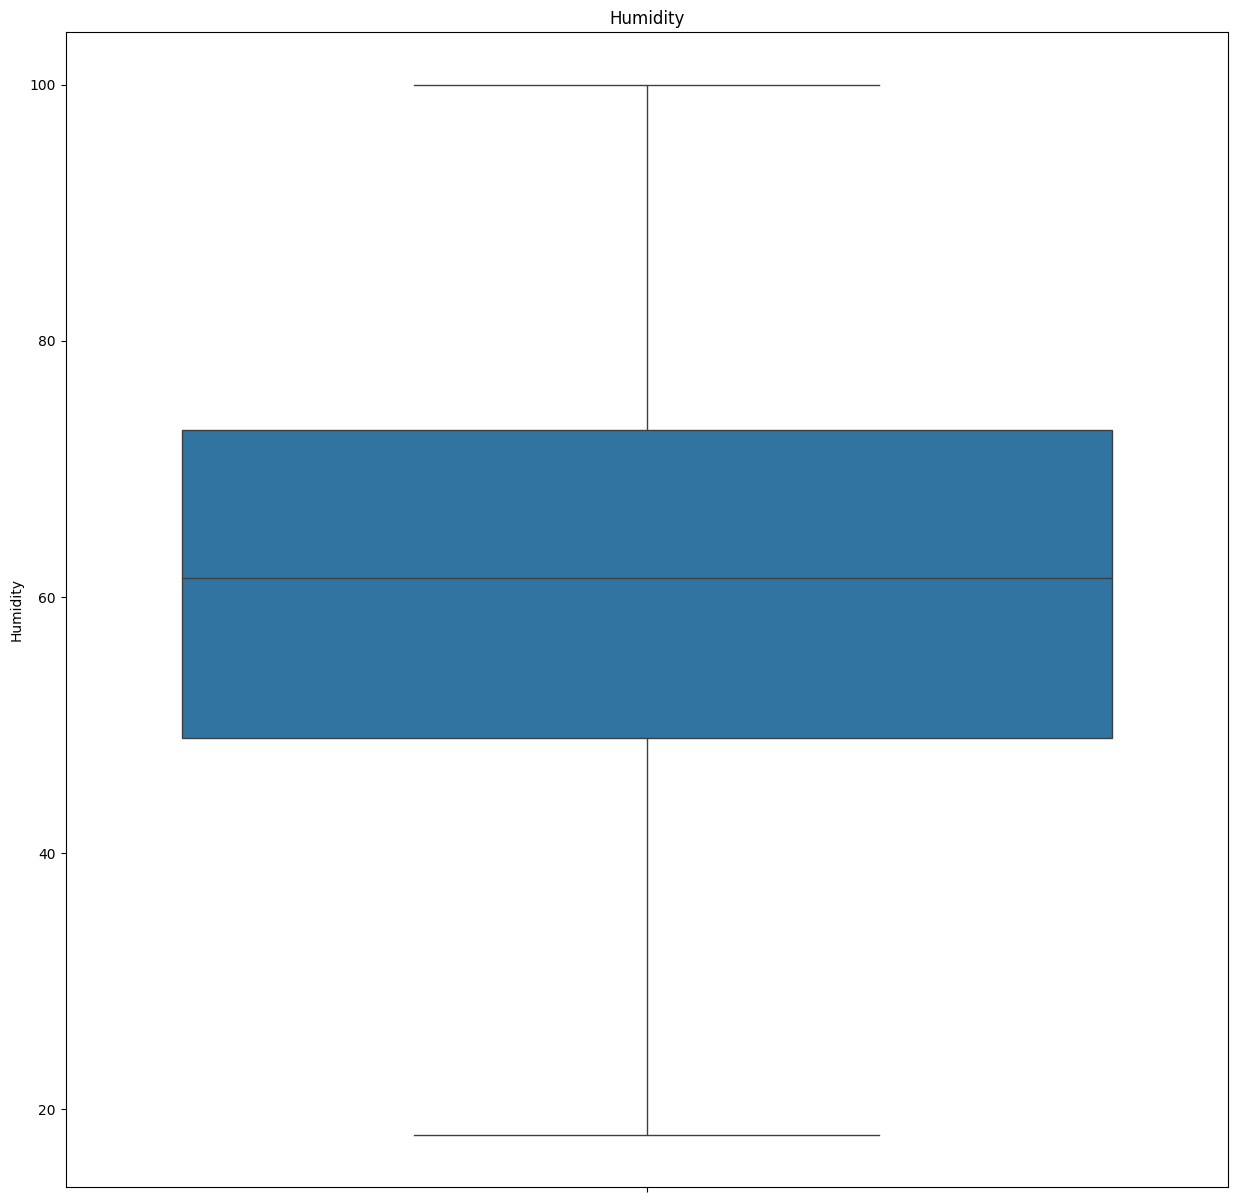

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [ ]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Temp


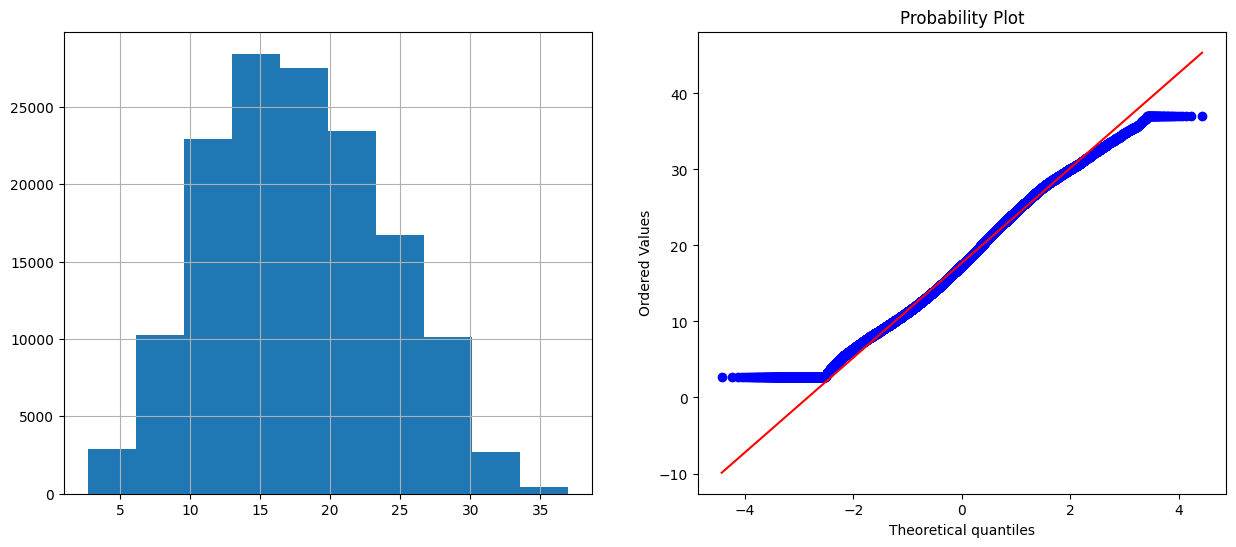

WindSpeed


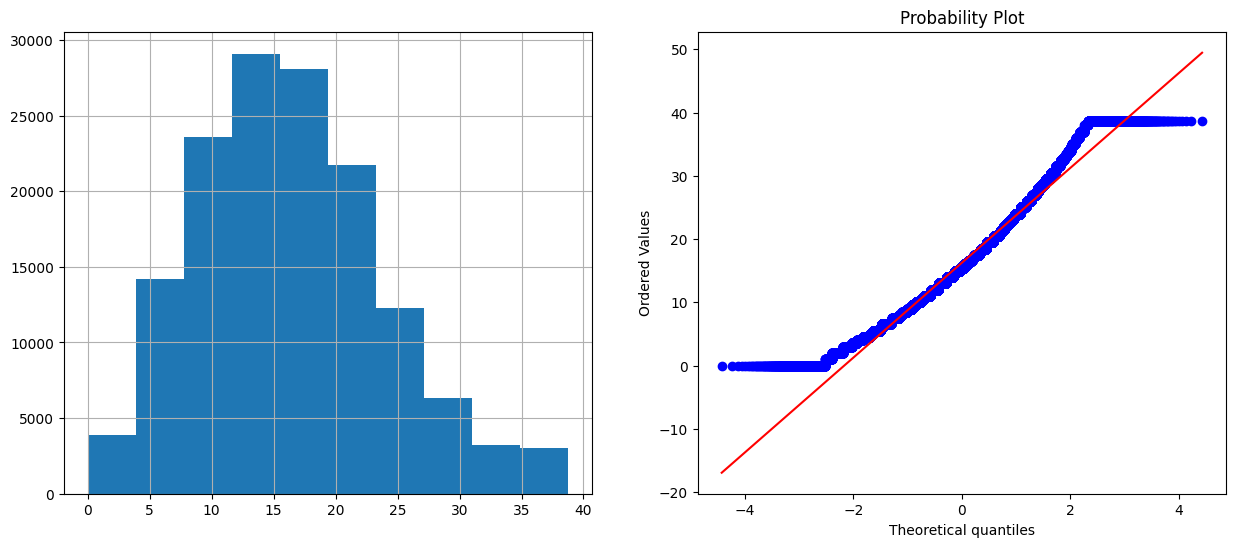

Humidity


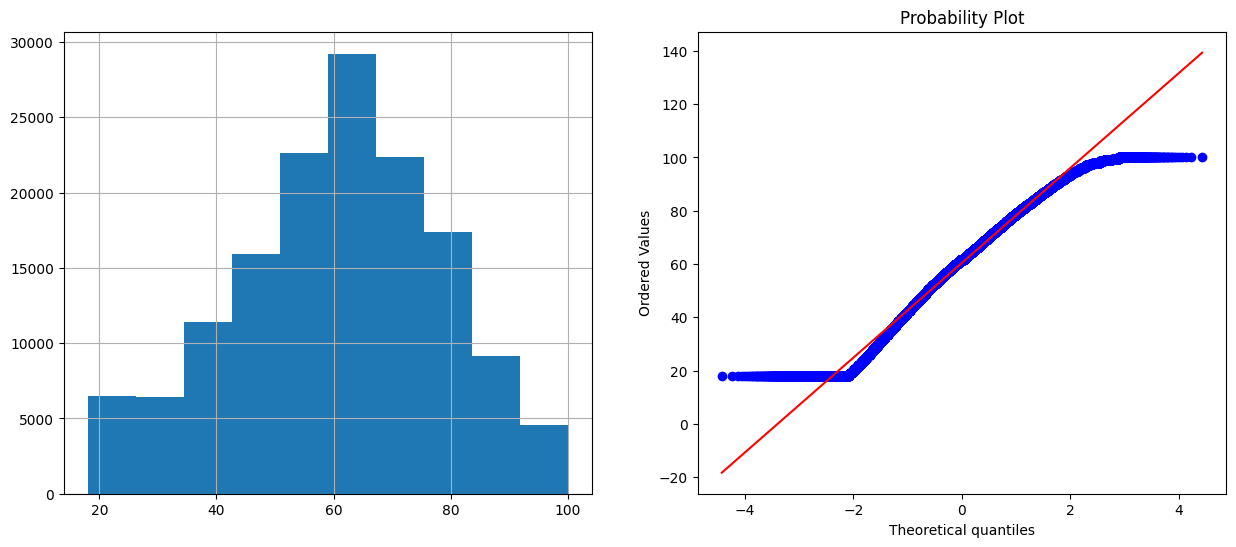

In [ ]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
df.to_csv("preprocessed_1.csv", index=False)

In [ ]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [ ]:
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [ ]:
X_train

,Temp,WindSpeed,Humidity,RainToday,Month,Day
43447,14.50,16.0,48.0,False,6,19
140904,27.15,24.0,51.0,False,8,26
54615,20.80,19.5,39.5,False,2,25
109793,15.90,17.5,68.5,True,5,6
74462,21.95,26.5,51.0,False,1,25
...,...,...,...,...,...,...
106567,20.85,18.5,32.5,False,11,2
52791,7.25,25.0,99.0,True,11,30
56339,5.15,27.0,76.5,False,5,21
82299,9.00,21.0,87.5,True,8,24


In [ ]:
y_train

,RainTomorrow
43447,False
140904,False
54615,False
109793,False
74462,False
...,...
106567,False
52791,True
56339,False
82299,True


In [ ]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({False: 90866, True: 25502})
The number of classes after fit Counter({False: 90866, True: 90866})


In [ ]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 108ms	remaining: 3m 36s
1:	total: 164ms	remaining: 2m 44s
2:	total: 217ms	remaining: 2m 24s
3:	total: 257ms	remaining: 2m 8s
4:	total: 291ms	remaining: 1m 56s
5:	total: 338ms	remaining: 1m 52s
6:	total: 390ms	remaining: 1m 51s
7:	total: 435ms	remaining: 1m 48s
8:	total: 471ms	remaining: 1m 44s
9:	total: 509ms	remaining: 1m 41s
10:	total: 550ms	remaining: 1m 39s
11:	total: 589ms	remaining: 1m 37s
12:	total: 624ms	remaining: 1m 35s
13:	total: 676ms	remaining: 1m 35s
14:	total: 714ms	remaining: 1m 34s
15:	total: 755ms	remaining: 1m 33s
16:	total: 795ms	remaining: 1m 32s
17:	total: 832ms	remaining: 1m 31s
18:	total: 867ms	remaining: 1m 30s
19:	total: 917ms	remaining: 1m 30s
20:	total: 972ms	remaining: 1m 31s
21:	total: 1.01s	remaining: 1m 30s
22:	total: 1.05s	remaining: 1m 30s
23:	total: 1.09s	remaining: 1m 29s
24:	total: 1.13s	remaining: 1m 29s
25:	total: 1.18s	remaining: 1m 29s
26:	total: 1.23s	remaining: 1m 30s
27:	total: 1.31s	remaining: 1m 32s
2

In [ ]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21166  1551]
 [ 3608  2767]]
0.8226660250240616
              precision    recall  f1-score   support

       False       0.85      0.93      0.89     22717
        True       0.64      0.43      0.52      6375

    accuracy                           0.82     29092
   macro avg       0.75      0.68      0.70     29092
weighted avg       0.81      0.82      0.81     29092



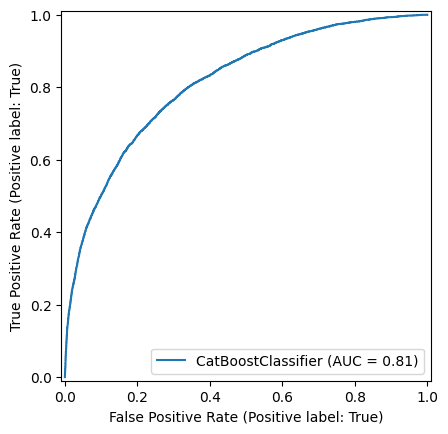

In [ ]:
metrics.RocCurveDisplay.from_estimator(cat, X_test, y_test)


In [ ]:
metrics.roc_auc_score(y_test, y_pred, average=None)

0.6828821777247237

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[19757  2960]
 [ 3029  3346]]
0.794135844905816
              precision    recall  f1-score   support

       False       0.87      0.87      0.87     22717
        True       0.53      0.52      0.53      6375

    accuracy                           0.79     29092
   macro avg       0.70      0.70      0.70     29092
weighted avg       0.79      0.79      0.79     29092



0.6972819249987269

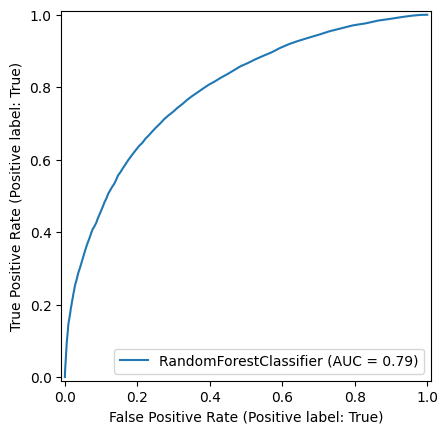

In [ ]:
metrics.RocCurveDisplay.from_estimator(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [ ]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17443  5274]
 [ 2139  4236]]
0.7451876804619827
              precision    recall  f1-score   support

       False       0.89      0.77      0.82     22717
        True       0.45      0.66      0.53      6375

    accuracy                           0.75     29092
   macro avg       0.67      0.72      0.68     29092
weighted avg       0.79      0.75      0.76     29092



0.7161548257459431

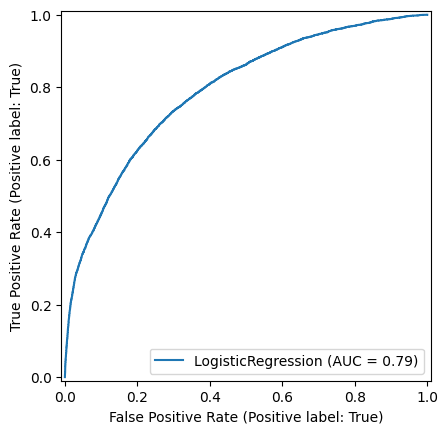

In [ ]:
metrics.RocCurveDisplay.from_estimator(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[18136  4581]
 [ 2616  3759]]
0.7526124020349237
              precision    recall  f1-score   support

       False       0.87      0.80      0.83     22717
        True       0.45      0.59      0.51      6375

    accuracy                           0.75     29092
   macro avg       0.66      0.69      0.67     29092
weighted avg       0.78      0.75      0.76     29092



0.693995955348288

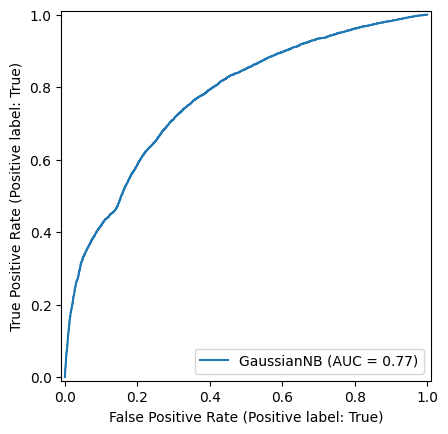

In [ ]:
metrics.RocCurveDisplay.from_estimator(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[16851  5866]
 [ 2566  3809]]
0.7101608689674137
              precision    recall  f1-score   support

       False       0.87      0.74      0.80     22717
        True       0.39      0.60      0.47      6375

    accuracy                           0.71     29092
   macro avg       0.63      0.67      0.64     29092
weighted avg       0.76      0.71      0.73     29092



0.6696347401574532

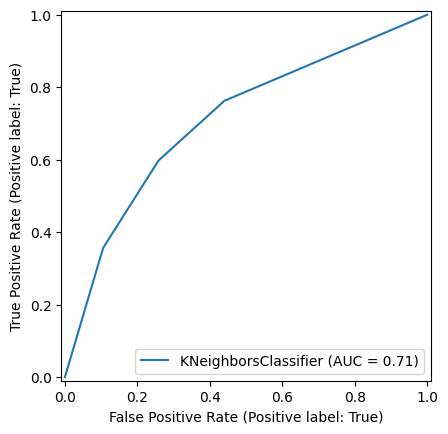

In [ ]:
metrics.RocCurveDisplay.from_estimator(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[19753  2964]
 [ 2913  3462]]
0.7979857005362299
              precision    recall  f1-score   support

       False       0.87      0.87      0.87     22717
        True       0.54      0.54      0.54      6375

    accuracy                           0.80     29092
   macro avg       0.71      0.71      0.71     29092
weighted avg       0.80      0.80      0.80     29092



0.7062919244204263

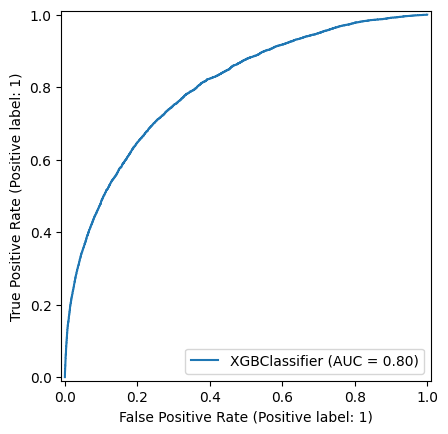

In [ ]:
metrics.RocCurveDisplay.from_estimator(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None)

In [ ]:
#joblib.dump(rf, "rf.pkl")
#joblib.dump(cat, "cat.pkl")
#joblib.dump(gnb, "gnb.pkl")
#joblib.dump(knn, "knn.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

In [ ]:
joblib.dump(logreg, "logreg.pkl")

In [ ]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

In [ ]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

In [ ]:
metrics.RocCurveDisplay.from_estimator(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)

In [ ]:
joblib.dump(svc, "svc.pkl")

In [ ]:
joblib.dump(logreg, "logreg.pkl")